In [ ]:
!unzip license-plate-recognition.zip

Archive:  license-plate-recognition.zip
  inflating: 1-LPR-950/1-LPR-950/1/License_00001.jpg  
  inflating: 1-LPR-950/1-LPR-950/1/License_00002.jpg  
  inflating: 1-LPR-950/1-LPR-950/1/License_00003.jpg  
  inflating: 1-LPR-950/1-LPR-950/1/License_00004.jpg  
  inflating: 1-LPR-950/1-LPR-950/1/License_00005.jpg  
  inflating: 1-LPR-950/1-LPR-950/1/License_00006.jpg  
  inflating: 1-LPR-950/1-LPR-950/1/License_00007.jpg  
  inflating: 1-LPR-950/1-LPR-950/1/License_00008.jpg  
  inflating: 1-LPR-950/1-LPR-950/1/License_00009.jpg  
  inflating: 1-LPR-950/1-LPR-950/1/License_00010.jpg  
  inflating: 1-LPR-950/1-LPR-950/1/License_00011.jpg  
  inflating: 1-LPR-950/1-LPR-950/1/License_00012.jpg  
  inflating: 1-LPR-950/1-LPR-950/1/License_00013.jpg  
  inflating: 1-LPR-950/1-LPR-950/1/License_00014.jpg  
  inflating: 1-LPR-950/1-LPR-950/1/License_00015.jpg  
  inflating: 1-LPR-950/1-LPR-950/1/License_00016.jpg  
  inflating: 1-LPR-950/1-LPR-950/1/License_00017.jpg  
  inflating: 1-LPR-950/1-

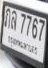

In [ ]:
from PIL import Image
image = Image.open('1-LPR-950/1-LPR-950/1/License_00001.jpg')
image

In [ ]:
f = open("1-LPR-950/1-LPR-950/1/labels/License_00001.txt", "r")
print(f.read())

54 0.489588 0.720586 0.770837 0.411763
41 0.135412 0.272055 0.145837 0.426468
45 0.302088 0.30147 0.229162 0.338235
7 0.46875 0.34559 0.145837 0.426468
7 0.583337 0.389703 0.125 0.426468
7 0.854162 0.448528 0.166662 0.397059
6 0.729162 0.426471 0.208337 0.441179



In [ ]:
import torch

print(f'Setup complete. Using torch {torch.__version__}')
print(f"{torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'}")

Setup complete. Using torch 2.3.0
NVIDIA A100-SXM4-40GB


In [ ]:
import ultralytics

ultralytics.checks()

Ultralytics YOLOv8.2.31 🚀 Python-3.12.3 torch-2.3.0 CUDA:0 (NVIDIA A100-SXM4-40GB, 40338MiB)
Setup complete ✅ (64 CPUs, 502.7 GB RAM, 0.2/251.4 GB disk)


In [ ]:
!pwd

/project/lt900202-ai24xb/last_5hack/license_plate


In [ ]:
!yolo task=detect mode=train epochs=100 batch=64 plots=True model=yolov8l.pt data=license.yaml device=[0,1,2,3] imgsz=512 val=False

Ultralytics YOLOv8.2.31 🚀 Python-3.12.3 torch-2.3.0 CUDA:0 (NVIDIA A100-SXM4-40GB, 40338MiB)
                                                     CUDA:1 (NVIDIA A100-SXM4-40GB, 40338MiB)
                                                     CUDA:2 (NVIDIA A100-SXM4-40GB, 40338MiB)
                                                     CUDA:3 (NVIDIA A100-SXM4-40GB, 40338MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=license.yaml, epochs=100, time=None, patience=100, batch=64, imgsz=512, save=True, save_period=-1, cache=False, device=[0, 1, 2, 3], workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=False, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=

# predict

In [ ]:
import pandas as pd

sp_sb = pd.read_csv('submission.csv')
sp_sb

,image_id,label
0,4f6e0dff-7bc1-4db7-8e8a-dd5a7b2c04d4,0ฬ-0674
1,2678e665-50a9-42eb-8b98-3a1323a8950d,05กฒ4901
2,1b3bee82-898d-4aa8-9a7e-6f375ad62d8f,1กฉ9661
3,6d997bce-395e-4d25-85e4-dec70ead7954,NaN
4,59c765b1-cdac-4fa7-902c-685f1591decf,NaN
...,...,...
1695,1c766e55-3096-4814-8c23-7cb8facc0e36,NaN
1696,98e8495a-e51d-494f-951d-739a93d87777,NaN
1697,935248b8-1fe9-4cc3-8894-007bd715d309,NaN
1698,df48b54b-8e63-4484-85f1-99a6c97e92f4,NaN


In [ ]:
test = pd.read_csv('test.csv')
test

,image_id,x1,y1,x2,y2
0,4f6e0dff-7bc1-4db7-8e8a-dd5a7b2c04d4,333.014354,205.741627,394.497608,238.277512
1,2678e665-50a9-42eb-8b98-3a1323a8950d,293.574297,201.867470,358.634538,235.200803
2,1b3bee82-898d-4aa8-9a7e-6f375ad62d8f,306.425703,204.277108,362.248996,227.168675
3,6d997bce-395e-4d25-85e4-dec70ead7954,332.530120,199.056225,397.991968,228.775100
4,59c765b1-cdac-4fa7-902c-685f1591decf,312.466844,160.477454,378.779841,193.103448
...,...,...,...,...,...
1695,1c766e55-3096-4814-8c23-7cb8facc0e36,326.506024,205.481928,380.321285,237.208835
1696,98e8495a-e51d-494f-951d-739a93d87777,311.962963,201.308642,374.308642,232.790123
1697,935248b8-1fe9-4cc3-8894-007bd715d309,305.790123,204.395062,371.839506,236.493827
1698,df48b54b-8e63-4484-85f1-99a6c97e92f4,328.012346,215.506173,389.740741,247.604938


## eda process

In [ ]:
from ultralytics import YOLO
import torch
# from ultralytics import RTDETR

device = 'cuda' if torch.cuda.is_available() else 'cpu'

inference_model = YOLO('runs/detect/train3/weights/best.pt')
inference_model.to(device)
# inference_model = RTDETR('runs/detect/train/weights/best.pt')

In [ ]:
def detect_objects(image_path, model):
    results = model.predict(source=image_path, conf=0.600125, device=0)
    boxes = results[0].boxes.xyxy[:, :4].cpu().numpy()
    classes = results[0].boxes.cls.cpu().numpy()
    scores = results[0].boxes.conf.cpu().numpy()
    boxes_n = []
    for boxe in boxes:
      boxe = [int(i) for i in boxe]
      boxes_n.append(boxe)
    classes = [int(classe) for classe in classes]
    scores = [round(score, 4) for score in scores]
    return boxes_n, classes, scores

In [ ]:
image_path = 'test/test/4f6e0dff-7bc1-4db7-8e8a-dd5a7b2c04d4.jpg'
boxes, classes, scores = detect_objects(image_path, inference_model) # boxes, classes, scores
boxes, classes, scores


image 1/1 /lustrefs/disk/project/lt900202-ai24xb/last_5hack/license_plate/test/test/4f6e0dff-7bc1-4db7-8e8a-dd5a7b2c04d4.jpg: 288x512 1 4, 113.3ms
Speed: 78.2ms preprocess, 113.3ms inference, 53.2ms postprocess per image at shape (1, 3, 288, 512)


([[337, 157, 395, 207]], [4], [0.6512])

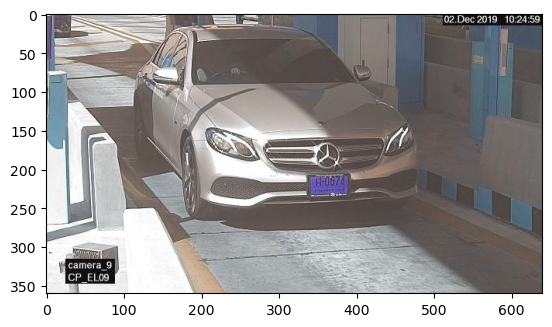

(360, 640, 3)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread(image_path, cv2.COLOR_BGR2RGB)
plt.imshow(image, cmap='grey')
plt.show()
image.shape

In [ ]:
test.loc[0,'x1']

333.0143540669857

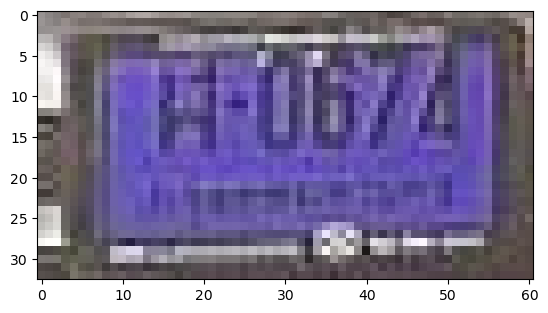

In [ ]:
zoomImage = image[int(test.loc[0,'y1']):int(test.loc[0,'y2']), int(test.loc[0,'x1']):int(test.loc[0,'x2'])]
zoomImage
plt.imshow(zoomImage, cmap='grey')
plt.show()

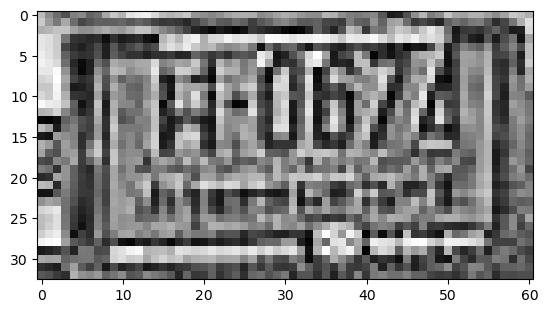

(33, 61)

In [ ]:
def image_process(image):
  if len(image.shape) == 3:
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
  else:
    gray_image = image

  blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0.1)

  clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
  clahe_image = clahe.apply(blurred_image)
  return clahe_image
plt.imshow(image_process(zoomImage), cmap='grey')
plt.show()
image_process(zoomImage).shape

In [ ]:
num2class = {0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'ก',
 11: 'ข',
 12: 'ฃ',
 13: 'ค',
 14: 'ฅ',
 15: 'ฆ',
 16: 'ง',
 17: 'จ',
 18: 'ฉ',
 19: 'ช',
 20: 'ซ',
 21: 'ฌ',
 22: 'ญ',
 23: 'ฎ',
 24: 'ฏ',
 25: 'ฐ',
 26: 'ฑ',
 27: 'ฒ',
 28: 'ณ',
 29: 'ด',
 30: 'ต',
 31: 'ถ',
 32: 'ท',
 33: 'ธ',
 34: 'น',
 35: 'บ',
 36: 'ป',
 37: 'ผ',
 38: 'ฝ',
 39: 'พ',
 40: 'ฟ',
 41: 'ภ',
 42: 'ม',
 43: 'ย',
 44: 'ร',
 45: 'ล',
 46: 'ว',
 47: 'ศ',
 48: 'ษ',
 49: 'ส',
 50: 'ห',
 51: 'ฬ',
 52: 'อ',
 53: 'ฮ',
 54: 'กรุงเทพมหานคร',
 55: 'กระบี่',
 56: 'กาญจนบุรี',
 57: 'กาฬสินธุ์',
 58: 'กำแพงเพชร',
 59: 'ขอนแก่น',
 60: 'จันทบุรี',
 61: 'ฉะเชิงเทรา',
 62: 'ชลบุรี',
 63: 'ชัยนาท',
 64: 'ชัยภูมิ',
 65: 'ชุมพร',
 66: 'เชียงราย',
 67: 'เชียงใหม่',
 68: 'ตรัง',
 69: 'ตราด',
 70: 'ตาก',
 71: 'นครนายก',
 72: 'นครปฐม',
 73: 'นครพนม',
 74: 'นครราชสีมา',
 75: 'นครศรีธรรมราช',
 76: 'นครสวรรค์',
 77: 'นนทบุรี',
 78: 'นราธิวาส',
 79: 'น่าน',
 80: 'บึงกาฬ',
 81: 'บุรีรัมย์',
 82: 'ปทุมธานี',
 83: 'ประจวบคีรีขันธ์',
 84: 'ปราจีนบุรี',
 85: 'ปัตตานี',
 86: 'พระนครศรีอยุธยา',
 87: 'พังงา',
 88: 'พัทลุง',
 89: 'พิจิตร',
 90: 'พิษณุโลก',
 91: 'เพชรบุรี',
 92: 'เพชรบูรณ์',
 93: 'แพร่',
 94: 'พะเยา',
 95: 'ภูเก็ต',
 96: 'มหาสารคาม',
 97: 'มุกดาหาร',
 98: 'แม่ฮ่องสอน',
 99: 'ยะลา',
 100: 'ยโสธร',
 101: 'ร้อยเอ็ด',
 102: 'ระนอง',
 103: 'ระยอง',
 104: 'ราชบุรี',
 105: 'ลพบุรี',
 106: 'ลำปาง',
 107: 'ลำพูน',
 108: 'เลย',
 109: 'ศรีสะเกษ',
 110: 'สกลนคร',
 111: 'สงขลา',
 112: 'สตูล',
 113: 'สมุทรปราการ',
 114: 'สมุทรสงคราม',
 115: 'สมุทรสาคร',
 116: 'สระแก้ว',
 117: 'สระบุรี',
 118: 'สิงห์บุรี',
 119: 'สุโขทัย',
 120: 'สุพรรณบุรี',
 121: 'สุราษฎร์ธานี',
 122: 'สุรินทร์',
 123: 'หนองคาย',
 124: 'หนองบัวลำภู',
 125: 'อ่างทอง',
 126: 'อุดรธานี',
 127: 'อุทัยธานี',
 128: 'อุตรดิตถ์',
 129: 'อุบลราชธานี',
 130: 'อำนาจเจริญ'}

In [ ]:
from PIL import Image

_, classes, _ = detect_objects(zoomImage, inference_model)  # results list
classes


0: 288x512 1 7, 1 ธ, 1 กรุงเทพมหานคร, 8.5ms
Speed: 0.8ms preprocess, 8.5ms inference, 0.9ms postprocess per image at shape (1, 3, 288, 512)


[33, 54, 7]

In [ ]:
label_ls = []
label_ls.append(classes)
label_ls

[[33, 54, 7]]

## real process

In [ ]:
from tqdm import tqdm
annotation_ls = []
label_ls = []

for name in tqdm(sp_sb['image_id']):
    image_path = 'test/test/{name_img}.jpg'.format(name_img=name)
    image = cv2.imread(image_path, cv2.COLOR_BGR2RGB)
    img_atb = test[test['image_id'] == name]
    zoomImage = image[int(img_atb['y1']):int(img_atb['y2']), int(img_atb['x1']):int(img_atb['x2'])]
    pro_img = image_process(zoomImage)
    _, classes, _ = detect_objects(zoomImage, inference_model) # boxes, classes, scores
    annotation_ls.append(boxes)
    label_ls.append(classes)

In [ ]:
label_ls[:5]

[[33, 54, 7],
 [27, 9, 10, 5, 0, 54, 4],
 [18, 9, 6, 10, 6, 1],
 [6, 4, 4, 50, 54],
 [21, 33, 7, 5, 9, 4, 54]]

In [ ]:
[num2class[key] for key in label_ls[7]]

['ย', 'ก', '2', '6', '3', '9', 'กรุงเทพมหานคร']

In [ ]:
new_label = []
for i in range(len(label_ls)):
    new_lb_i = [num2class[key] for key in label_ls[i]]
    town = ""
    check_minus = False # have this "-" ?
    num_ls = []
    char_ls = []
    txt_lb = ""

    for j in new_lb_i:
        if j.isnumeric():
            num_ls.append(j)
        else:
            if len(j) > 1:
                town = j
            else:
                char_ls.append(j)

    if town == 'กรุงเทพมหานคร':
        txt_lb += '0'
    else:
        txt_lb += '1'

    for j in char_ls:
        txt_lb += j

    if check_minus:
        txt_lb += "-"

    for j in num_ls:
        txt_lb += j

    new_label.append(txt_lb)

In [ ]:
new_label

['0ธ7',
 '0ฒก9504',
 '1ฉก9661',
 '0ห644',
 '0ฌธ7594',
 '0ฒก5765',
 '0ษก49546',
 '0ยก2639',
 '0ต7',
 '0มพ37',
 '0ดก20848',
 '1รญ8561',
 '0กก97544',
 '0ษฮ564',
 '1ห2841',
 '0ลก95287',
 '0กล35255',
 '0ขก0864',
 '0บก63161',
 '0ฒฉ2718',
 '1ฎภ396',
 '0กด72668',
 '0ภก58698',
 '1ขก85743',
 '0ตก86707',
 '0ฮฆ2961',
 '0มก6061',
 '0ฒญ618',
 '0มฒ1953',
 '0กผ67784',
 '09949',
 '1ก4613',
 '0กส34314',
 '0กท99687',
 '0ษก54406',
 '0ภ974',
 '1ฉก56016',
 '0วก25170',
 '0ฒก13096',
 '0กต85684',
 '0กค91485',
 '0รก5172',
 '0สณ5770',
 '0งญ9283',
 '0กค40235',
 '0ฮก51715',
 '0ผก96324',
 '0มช4606',
 '0ฌก9278',
 '1ศห6886',
 '0กท87874',
 '0ฆก90984',
 '0ญ6310',
 '1ก27654',
 '1งก879',
 '0ญก42147',
 '0ฉร9595',
 '0ตก07065',
 '0ผก395',
 '0ฎบ2111',
 '0ขก19662',
 '0กญ54434',
 '0ศจ3311',
 '0ก94316',
 '0ฒก30107',
 '0ฮก22144',
 '0วญ7171',
 '0วก63714',
 '0ฬก27837',
 '0ชม4974',
 '0ฒท2988',
 '0กต3847',
 '1ญ274',
 '0กพ95542',
 '0ณก8823',
 '0ญท263',
 '0ขก3404',
 '0ขก33428',
 '0กศ2057',
 '1กห1789',
 '0กล02171',
 '0ฎก85827',
 '0ฐก91

In [ ]:
sp_sb.loc[3:, 'label'] = new_label[3:]
sp_sb

,image_id,label
0,4f6e0dff-7bc1-4db7-8e8a-dd5a7b2c04d4,0ฬ-0674
1,2678e665-50a9-42eb-8b98-3a1323a8950d,05กฒ4901
2,1b3bee82-898d-4aa8-9a7e-6f375ad62d8f,1กฉ9661
3,6d997bce-395e-4d25-85e4-dec70ead7954,0ห644
4,59c765b1-cdac-4fa7-902c-685f1591decf,0ฌธ7594
...,...,...
1695,1c766e55-3096-4814-8c23-7cb8facc0e36,0กก71644
1696,98e8495a-e51d-494f-951d-739a93d87777,0รพ6776
1697,935248b8-1fe9-4cc3-8894-007bd715d309,0กก97602
1698,df48b54b-8e63-4484-85f1-99a6c97e92f4,0ภก454


In [ ]:
sp_sb.to_csv('comvis_yolol8_clahe01.csv', index=False)